In [1]:
document = ["This is the most beautiful place in the world.", "This man has more skills to show in cricket than any other game.", "Hi there! how was your ladakh trip last month?", "There was a player who had scored 200+ runs in single cricket innings in his career.", "I have got the opportunity to travel to Paris next year for my internship.", "May be he is better than you in batting but you are much better than him in bowling.", "That was really a great day for me when I was there at Lavasa for the whole night.", "That’s exactly I wanted to become, a highest ratting batsmen ever with top scores.", "Does it really matter wether you go to Thailand or Goa, its just you have spend your holidays.", "Why don’t you go to Switzerland next year for your 25th Wedding anniversary?", "Travel is fatal to prejudice, bigotry, and narrow mindedness., and many of our people need it sorely on these accounts.", "Stop worrying about the potholes in the road and enjoy the journey.", "No cricket team in the world depends on one or two players. The team always plays to win.", "Cricket is a team game. If you want fame for yourself, go play an individual game.", "Because in the end, you won’t remember the time you spent working in the office or mowing your lawn. Climb that goddamn mountain.", "Isn’t cricket supposed to be a team sport? I feel people should decide first whether cricket is a team game or an individual sport."]

In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
#https://towardsdatascience.com/applying-machine-learning-to-classify-an-unsupervised-text-document-e7bb6265f52

In [3]:
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(document)

In [4]:
true_k = 3
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X)

KMeans(max_iter=100, n_clusters=3, n_init=1)

In [5]:
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
print(terms)

['200', '25th', 'accounts', 'anniversary', 'batsmen', 'batting', 'beautiful', 'better', 'bigotry', 'bowling', 'career', 'climb', 'cricket', 'day', 'decide', 'depends', 'does', 'don', 'end', 'enjoy', 'exactly', 'fame', 'fatal', 'feel', 'game', 'goa', 'goddamn', 'got', 'great', 'hi', 'highest', 'holidays', 'individual', 'innings', 'internship', 'isn', 'journey', 'just', 'ladakh', 'lavasa', 'lawn', 'man', 'matter', 'mindedness', 'month', 'mountain', 'mowing', 'narrow', 'need', 'night', 'office', 'opportunity', 'paris', 'people', 'place', 'play', 'player', 'players', 'plays', 'potholes', 'prejudice', 'ratting', 'really', 'remember', 'road', 'runs', 'scored', 'scores', 'single', 'skills', 'sorely', 'spend', 'spent', 'sport', 'stop', 'supposed', 'switzerland', 'team', 'thailand', 'time', 'travel', 'trip', 'want', 'wanted', 'wedding', 'wether', 'win', 'won', 'working', 'world', 'worrying', 'year']


In [6]:
for i in range(true_k):
 print("Cluster %d:" % i),
 for ind in order_centroids[i, :15]:
     print(" %s" % terms[ind])

Cluster 0:
 scores
 stop
 worrying
 ratting
 batsmen
 exactly
 journey
 wanted
 enjoy
 potholes
 road
 highest
 game
 goa
 goddamn
Cluster 1:
 cricket
 team
 game
 man
 skills
 individual
 sport
 fame
 want
 play
 runs
 scored
 single
 career
 200
Cluster 2:
 better
 year
 really
 travel
 place
 beautiful
 world
 trip
 hi
 month
 ladakh
 day
 night
 lavasa
 great


In [7]:
print("\n")
print("Prediction")
Y = vectorizer.transform(["Nothing is easy in cricket. Maybe when you watch it on TV, it looks easy. But it is not. You have to use your brain and time the ball."])
predicted = model.predict(Y)
print(predicted)



Prediction
[1]


https://www.kaggle.com/dfoly1/k-means-clustering-from-scratch

In [8]:
def get_top_features_cluster(tf_idf_array, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label) # indices for each cluster
        x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 20 scores
        features = vectorizer.get_feature_names()
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns = ['features', 'score'])
        dfs.append(df)
    return dfs

In [12]:
from sklearn.preprocessing import normalize
tf_idf_norm = normalize(X)
tf_idf_array = tf_idf_norm.toarray()
dfs = get_top_features_cluster(tf_idf_array, predicted, 20)
print (dfs)

[      features     score
0        place  0.602102
1    beautiful  0.602102
2        world  0.524354
3   internship  0.000000
4          goa  0.000000
5      goddamn  0.000000
6          got  0.000000
7        great  0.000000
8           hi  0.000000
9      highest  0.000000
10    holidays  0.000000
11  individual  0.000000
12     innings  0.000000
13        year  0.000000
14        feel  0.000000
15         isn  0.000000
16     journey  0.000000
17        just  0.000000
18      ladakh  0.000000
19      lavasa  0.000000]


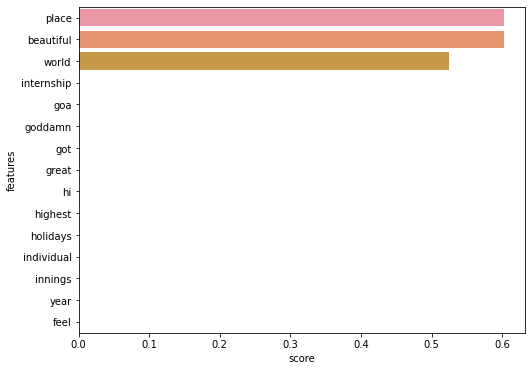

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
sns.barplot(x = 'score' , y = 'features', orient = 'h' , data = dfs[0][:15])

In [14]:
plt.figure(figsize=(8,6))
sns.barplot(x = 'score' , y = 'features', orient = 'h' , data = dfs[1][:15])

IndexError: list index out of range

<Figure size 576x432 with 0 Axes>

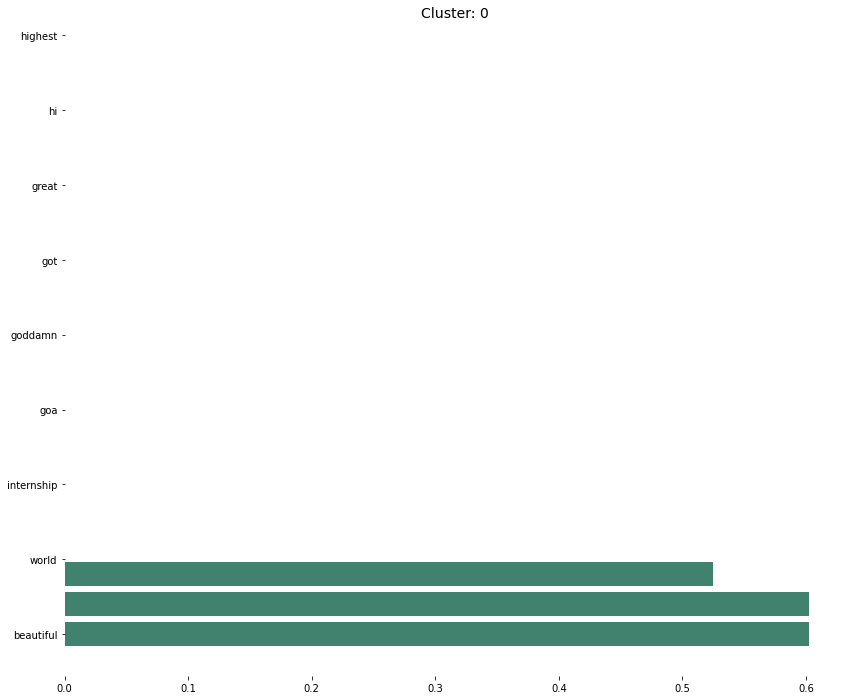

In [15]:
def plot_features(dfs):
    fig = plt.figure(figsize=(14,12))
    x = np.arange(len(dfs[0]))
    for i, df in enumerate(dfs):
        ax = fig.add_subplot(1, len(dfs), i+1)
        ax.set_title("Cluster: "+ str(i), fontsize = 14)
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.set_frame_on(False)
        ax.get_xaxis().tick_bottom()
        ax.get_yaxis().tick_left()
        ax.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))
        ax.barh(x, df.score, align='center', color='#40826d')
        yticks = ax.set_yticklabels(df.features)
    plt.show();
plot_features(dfs)